<a href="https://colab.research.google.com/github/chasubeen/ESAA_8th_OB/blob/Week_6/%ED%85%8D%EC%8A%A4%ED%8A%B8%20%EB%B6%84%EC%84%9D%20%EC%8B%A4%EC%8A%B5_%EC%9B%94%EA%B0%84%20%EB%8D%B0%EC%9D%B4%EC%BD%98%20%EC%86%8C%EC%84%A4%20%EC%9E%91%EA%B0%80%20%EB%B6%84%EB%A5%98%20AI%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Facebook의 fasttext를 이용한 text classification**

In [13]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199776 sha256=05c41bcaf5d4b3a5c1912de0299451dc92194565cbbe3a37e2140489c74e9a89
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


## **1-0. Library Import**

In [14]:
import pandas as pd
import numpy as np

import fasttext

## **1-1. 데이터 준비**
- 학습 데이터를 FastText 모델을 학습하기 위한 형식으로 변환하여 ```fasttexttrain.txt``` 파일에 저장

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
## 데이터 불러오기

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/OB/6주차/data/train.csv')
train.head()

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3


In [ ]:
## FastText 모델 학습을 위한 텍스트 파일 생성

file = open('fasttexttrain.txt','w+') # 편집 모드로 open
for i in train.index:
  # 각 행의 'author'(레이블)과 'text'(텍스트)를 가져와서 FastText 모델 학습 형식에 맞게 변환
  line = '__label__' + str(train['author'][i])+' '+train['text'][i]
  # 변환된 데이터를 파일에 작성
  file.write(line+"\n")

## **1-2. FastText 모델 학습**
- FastText 모델을 학습
  - 주요 학습 parameters
    - ```epoch = 30```: 학습 에포크 수를 30으로 설정
    - ```minCount = 2```: 단어의 최소 등장 횟수를 2로 설정
    - ```maxn = 10```: 최대 문자 n-gram 길이를 10으로 설
    - ```verbose = 0```: 학습 과정에서 출력을 최소화
- 학습된 FastText 모델의 단어 리스트와 레이블 리스트를 출력

In [ ]:
## Text Classification

# FastText 모델을 지도학습으로 학습
text_clf_model = fasttext.train_supervised('fasttexttrain.txt',
                                           epoch = 30, minCount = 2, maxn = 10, verbose = 0)

# 학습된 모델의 단어 리스트와 레이블 리스트를 출력
print(text_clf_model.words)
print(text_clf_model.labels)

['the', 'and', 'to', 'of', '</s>', 'a', 'I', 'in', 'was', 'that', 'he', 'his', 'you', 'with', 'had', 'it', 'odin', 'for', 'as', 'at', 'not', 'my', 'have', 'is', 'be', 'her', 'said', 'on', 'she', 'but', 'odin,', 'all', 'from', 'me', 'by', 'him', 'were', 'which', 'so', 'this', 'been', 'would', 'The', 'an', 'your', 'are', 'very', 'no', 'He', 'one', 'Mr.', 'could', 'what', 'we', 'they', 'will', 'if', 'or', 'upon', 'there', 'when', 'out', 'do', 'who', 'up', '“I', 'some', 'am', 'odin.', 'more', 'into', 'It', 'their', 'about', 'But', 'only', 'should', 'little', 'must', 'than', 'like', 'any', 'know', 'such', 'did', 'man', 'has', 'see', 'And', 'them', 'can', 'our', 'never', 'much', 'come', 'before', 'She', 'down', 'may', 'think', 'how', 'made', 'it,', 'time', 'me,', 'came', 'now', 'great', 'two', 'good', 'might', 'old', 'You', 'over', 'shall', 'after', 'own', 'cried', 'though', 'him,', 'go', 'it.', 'say', 'without', 'even', 'other', 'you,', 'looked', 'Mrs.', 'then', 'Miss', 'thought', 'every', 

## **1-3. 텍스트 분류**
- 학습된 모델을 사용하여 주어진 텍스트를 분류

In [ ]:
# 주어진 텍스트를 분류하고 상위 5개의 레이블과 해당 레이블의 확률을 출력

result = text_clf_model.predict("He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; looked at odin, and was in evident perplexity.",
                                k = 5)
print(result)

(('__label__3', '__label__0', '__label__2', '__label__1', '__label__4'), array([9.97099817e-01, 1.53040036e-03, 8.87542381e-04, 3.16065009e-04,
       2.16221946e-04]))


## **1-4. 테스트 데이터 예측**
- 주어진 테스트 데이터에 대해 텍스트를 분류하고 결과를 ```result5_fasttext.csv``` 파일에 저장
- ```test``` 데이터프레임의 각 텍스트에 대해 FastText 모델을 사용하여 예측 수행

In [11]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/OB/6주차/data/test_x.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA 8기/OB/6주차/data/sample_submission.csv', index_col = False)

NameError: ignored

In [ ]:
# 각 테스트 데이터에 대해 FastText 모델을 사용하여 예측 수행

for i in test.index:
  labels, probabilities = text_clf_model.predict(test['text'][i], k = 5)
  for label, probability in zip(labels, probabilities):
    if '__label__0' == label:
        submission.loc[i, '0'] = probability
    elif '__label__1' == label:
        submission.loc[i, '1'] = probability
    elif '__label__2' == label:
        submission.loc[i, '2'] = probability
    elif '__label__3' == label:
        submission.loc[i, '3'] = probability
    elif '__label__4' == label:
        submission.loc[i, '4'] = probability

In [ ]:
submission.head()

,index,0,1,2,3,4
0,0,0.024559,0.441665,0.327124,0.203998,0.002703
1,1,0.112422,0.837793,0.001126,0.013922,0.034787
2,2,0.892150,0.055586,0.011489,0.021414,0.019411
3,3,0.023419,0.000855,0.925318,0.002234,0.048224
4,4,0.657009,0.102774,0.032243,0.178531,0.029493


- 주어진 텍스트가 다섯 개의 클래스(레이블) 중 어느 클래스에 속하는지와 해당 클래스에 대한 확률이 저장됨

In [ ]:
# 결과를 CSV 파일로 저장

submission.to_csv('result5_fasttext.csv', index = False)
print('end')

end


# **2. NLP 전처리**

## **2-0. NLP Preprocessing이란?**
- NLP 전처리는 정해진 정답이 없으며 데이터와 목적에 따라 달라짐
  - 주로 모델의 입력인 단어, 문장, 문서의 **vector**를 만들기 전에 진행됨


### **🧸 전처리 과정**
1. 데이터를 불러온 후 각 신문기사들을 눈으로 확인하며 특수문자, 불용어 그리고 문장 구조 등을 파악

2. 문제의 목적과 분석자의 재량에 따라 불용어를 설정하고 리스트에 저장
  - 특수 문자, 조사 등

3. 불용어 이외의 특수 문자들을 제거
  - 정규표현식 패키지(```re```)를 사용하여 한글과 영어 소문자를 제외한 모든 특수문자들을 제거

4. 형태소 분석을 통해 문장을 형태소 단위의 토큰으로 분리
  - 이때 전처리 시 설정한 불용어들을 결과로 반환해주는 형태소 분석기를 사용해야 함
  - 예를 들어 **조사**를 불용어로 설정하였는데 조사를 분리해주지 못하는 형태소 분석기는 후보에서 제외하면 됨

5. 형태소 단위의 토큰들을 기반으로 리스트에 저장된 불용어를 제거

## **2-1. 형태소 분석(Stemming)**
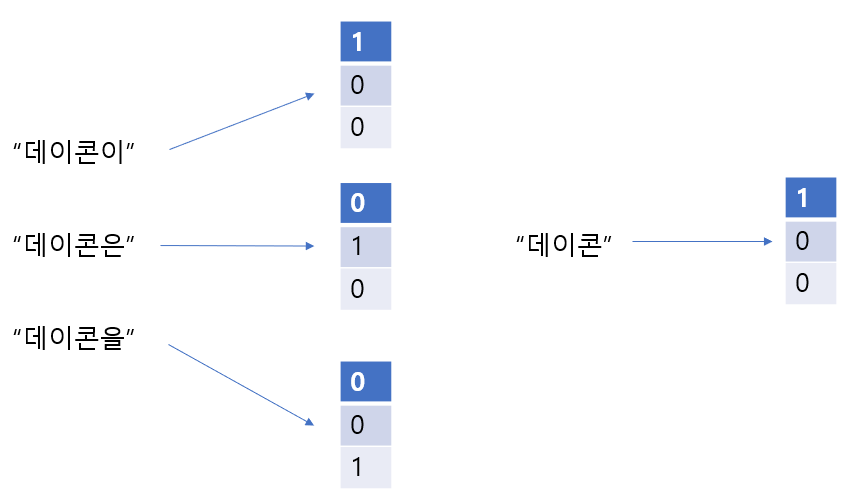</img><br/>


- 단어나 문장의 언어적 속성을 파악하는 것을 의미
- 보통 **품사 태깅(PoS)**을 통해 이루어짐
  - 한국어 형태소 분석은 ```Konlpy``` 패키지에 있는 다양한 함수를 이용하여 진행 가능

- **형태소 분석을 하는 이유**
1. 형태소 단위로 의미있는 단어를 가져가고 싶을 때
2. 품사 태깅을 통해 형용사나 명사를 추출하고 싶을 때

- 문장을 띄어쓰기 단위로 분류하여 vectorization을 하게 되면 같은 의미의 토큰 세 개가 서로 다른 vector를 갖게 됨
  - 이렇게 되면 모델이 세 단어를 각각 다른 단어로 이해함
  - 하지만 형태소 분석을 통해 토큰을 추출한다면 앞의 세 단어는 동일한 vector를 갖게 되며 모델이 해당 토큰을 더 잘 학습하는 데 도움이 됨
- 형태소 분석은 어쩌면 모델링보다 성능에 더 중요한 영향을 미치는 아주 중요한 과정임
  - 시간이 허락한다면 다양한 형태소 분석기를 사용하여 결과를 비교하는 것을 추천

### **2-1-1. Kkma()**

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(kkma.morphs(sentence))

형태소 단위로 문장 분리
----------------------
['데이', '콘', '에서', '다양', '하', 'ㄴ', '컴피티션', '을', '즐기', '면서', '실력', '있', '는', '데이터', '분석가', '로', '성장', '하', '세요', '!!', '.']


In [ ]:
print("문장에서 명사 추출")
print("----------------------")
print(kkma.nouns(sentence))

문장에서 명사 추출
----------------------
['데이', '데이콘', '콘', '다양', '컴피티션', '실력', '데이터', '분석가', '성장']


In [ ]:
print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

품사 태킹(PoS)
----------------------
[('데이', 'NNG'), ('콘', 'NNG'), ('에서', 'JKM'), ('다양', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('컴피티션', 'UN'), ('을', 'JKO'), ('즐기', 'VV'), ('면서', 'ECE'), ('실력', 'NNG'), ('있', 'VV'), ('는', 'ETD'), ('데이터', 'NNG'), ('분석가', 'NNG'), ('로', 'JKM'), ('성장', 'NNG'), ('하', 'XSV'), ('세요', 'EFN'), ('!!', 'SW'), ('.', 'SF')]


### **2-1-2. Okt()**

In [ ]:
from konlpy.tag import Okt
Okt = Okt()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(Okt.morphs(sentence))

형태소 단위로 문장 분리
----------------------
['데', '이콘', '에서', '다양한', '컴피티션', '을', '즐기면서', '실력', '있는', '데이터', '분석', '가로', '성장하세요', '!!.']


In [ ]:
print("문장에서 명사 추출")
print("----------------------")
print(Okt.nouns(sentence))

문장에서 명사 추출
----------------------
['데', '이콘', '컴피티션', '실력', '데이터', '분석', '가로']


In [ ]:
print("품사 태킹(PoS)")
print("----------------------")
print(Okt.pos(sentence))

품사 태킹(PoS)
----------------------
[('데', 'Noun'), ('이콘', 'Noun'), ('에서', 'Josa'), ('다양한', 'Adjective'), ('컴피티션', 'Noun'), ('을', 'Josa'), ('즐기면서', 'Verb'), ('실력', 'Noun'), ('있는', 'Adjective'), ('데이터', 'Noun'), ('분석', 'Noun'), ('가로', 'Noun'), ('성장하세요', 'Adjective'), ('!!.', 'Punctuation')]


## **2-2. 표제어 추출(Lemmatization)**

- 어간 추출

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '성장했었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

품사 태킹(PoS)
----------------------
[('성장', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [ ]:
sentence = '성장하였었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

품사 태킹(PoS)
----------------------
[('성장', 'NNG'), ('하', 'XSV'), ('였', 'EPT'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


## **2-3. 불용어 제거(Stopwords removing)**

- 불용어: 문장에서 큰 의미가 없다고 생각되는 단어, 글자들
- 불용어는 데이터와 문제에 따라 유동적

> 예시: "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"

* 예시 문장에서 감성분석을 진행할 때는 "훌륭한"과 "아름다운"등이 주요 특징으로 사용될 것임
- 하지만 경우에 따라서는 이러한 형용사들을 제외한 배우들의 연기력과 목소리라는 정보에 집중해야 할 때가 있음
  - 이럴때는 "훌륭한"과 "아름다운"은 불용어로 정의될 수 있음

In [ ]:
import re
from konlpy.tag import Okt

tokenizer = Okt() # 형태소 분석기

def text_preprocessing(text,tokenizer):
  stopwords = ['을', '를', '이', '가', '은', '는'] # 불용어 정의

  txt = re.sub('[^가-힣a-z]', ' ', text) # 영어 소문자와 한글을 제외한 모든 문자를 제거
  token = tokenizer.morphs(txt) # 형태소 분석
  token = [t for t in token if t not in stopwords] # 형태소 분석기를 거쳐 나온 결과들 중
                                                   # stopwords 리스트에 포함되지 않는 토큰만 저장

  return token

ex_text = "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
example_pre= text_preprocessing(ex_text,tokenizer)

In [ ]:
print(example_pre)

['이번', '에', '새롭게', '개봉', '한', '영화', '의', '배우', '들', '모두', '훌륭한', '연기력', '과', '아름다운', '목소리', '갖고', '있어']


## **2-4. 대회 적용**

In [ ]:
train.head()

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3


In [ ]:
def text_preprocessing(text_list):
  stopwords = ['을', '를', '이', '가', '은', '는', 'null'] # 불용어 설정
  tokenizer = Okt() # 형태소 분석기
  token_list = []

  for text in text_list:
    txt = re.sub('[^가-힣a-z]', ' ', text) # 한글과 영어 소문자만 남기고 다른 글자 모두 제거
    token = tokenizer.morphs(txt) # 형태소 분석
    token = [t for t in token if t not in stopwords or type(t) != float] # 형태소 분석 결과 중
                                                                         # stopwords에 해당하지 않는 것만 추출
    token_list.append(token)

  return token_list, tokenizer # 형태소 분석기를 따로 저장한 이유는 후에 test 데이터 전처리를 진행할 때 이용해야 되기 때문

train['new_article'], okt = text_preprocessing(train['text'])

# **3. 벡터화(Vectorization)**

## **3-1. Vectorization이란?**

- NLP를 컴퓨터가 이해할 수 있게 수치로 바꾸는 것
  - 이때 벡터로 변환된 고유의 토큰들이 모인 집합을 vocabulary 하며 vocabulary가 크면 클수록 학습이 오래 걸리게 됨


In [3]:
### 형태소 분석
# 벡터화 이전에 형태소 분석을 우선적으로 수행하자.

from konlpy.tag import Okt
import re

Okt = Okt()

sentences = ['자연어 처리는 정말 정말 즐거워.', '즐거운 자연어 처리 다같이 해보자.']
tokens = []

for sentence in sentences:
  sentence = re.sub('[^가-힣a-z]', ' ', sentence) # 간단한 전처리
  token = (Okt.morphs(sentence)) # 형태소 분석기를 이용햔 토큰 나누기
  tokens.append(' '.join(token))

print("형태소 단위로 문장 분리")
print("----------------------")
print(tokens)

형태소 단위로 문장 분리
----------------------
['자연어 처리 는 정말 정말 즐거워', '즐거운 자연어 처리 다 같이 해보자']


### **3-1-1. One-Hot Encoding**

- 해당 단어가 존재하면 1, 그렇지 않으면 모두 0으로 표시되는 기법
- keras를 이용하면 쉽게 구현이 가능하며 ```texts_to_sequences```를 활용해 각 토큰에 고유한 정수를 부여한 후 ```to_categorical```을 활용하면 간단하게 구현 가능
- 하지만, 이 방식은 vocabulary 크기가 커짐에 따라 많은 공간을 차지하게 되고 벡터가 굉장히 sparse해지기 때문에 모델에게 좋은 특성을 알려주지 못하는 경우가 대부분임


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# 토큰화
t = Tokenizer()
t.fit_on_texts(tokens)
print("각 토큰에게 고유의 정수 부여")
print("----------------------")
print(t.word_index)
print(" ")

s1 = t.texts_to_sequences(tokens)[0]
print("부여된 정수로 표시된 문장1")
print("----------------------")
print(s1)
print(" ")
s2 = t.texts_to_sequences(tokens)[1]
print("부여된 정수로 표시된 문장2")
print("----------------------")
print(s2)
print(" ")

# One-hot Encoding
s1_one_hot = to_categorical(s1)
print("문장1의 one-hot-encoding")
print("----------------------")
print(s1_one_hot)
print(" ")
s2_one_hot = to_categorical(s2)
print("문장2의 one-hot-encoding")
print("----------------------")
print(s2_one_hot)

각 토큰에게 고유의 정수 부여
----------------------
{'자연어': 1, '처리': 2, '정말': 3, '는': 4, '즐거워': 5, '즐거운': 6, '다': 7, '같이': 8, '해보자': 9}
 
부여된 정수로 표시된 문장1
----------------------
[1, 2, 4, 3, 3, 5]
 
부여된 정수로 표시된 문장2
----------------------
[6, 1, 2, 7, 8, 9]
 
문장1의 one-hot-encoding
----------------------
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
 
문장2의 one-hot-encoding
----------------------
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### **3-1-2.Count Vectorization**

- vocabulary를 활용하여 각 문장이 갖고 있는 토큰의 count를 기반으로 문장을 vectorization 해줌
  - 아래 예시를 통해 알아보자!

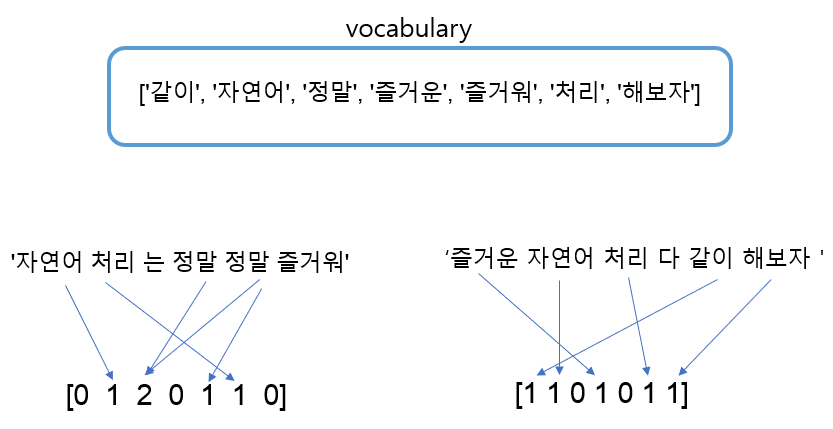</img><br/>

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(tokens) # 여러 개의 문장을 넣어줘야 작동합니다!!

print(vectorizer.get_feature_names_out())
print(vectors.toarray())

['같이' '자연어' '정말' '즐거운' '즐거워' '처리' '해보자']
[[0 1 2 0 1 1 0]
 [1 1 0 1 0 1 1]]


- 벡터화 결과 각 문장은 vocabulary의 인덱스를 기준으로 카운트가 정수로 표시된 것을 알 수 있음
  - 그러나 sklearn의 CountVectorizer는 한 글자는 자동으로 제거함
- 또한, '즐거운'과 '즐거워'는 같은 의미를 갖는 토큰이지만 okt는 이를 구분해주지 못해서 다른 토큰으로 분리가 되었음
  - 이는 모델에서 같은 의미의 토큰을 다르게 학습할 수 있음을 의미
> 형태소 분석기의 중요성

### **3-1-3. Tf-Idf**

- Tf-Idf의 핵심
1. 단어가 몇번 등장 했는지에 대한 정보
2. 어떤 단어가 언급된 문서의 수가 적다면 그 단어는 문서를 분류하는데 있어서 중요한 단어

> 즉 등장 횟수도 많고 문서에서 분별력 있는 단어들을 점수화하여 벡터화를 한 것이 Tf-Idf 기법임

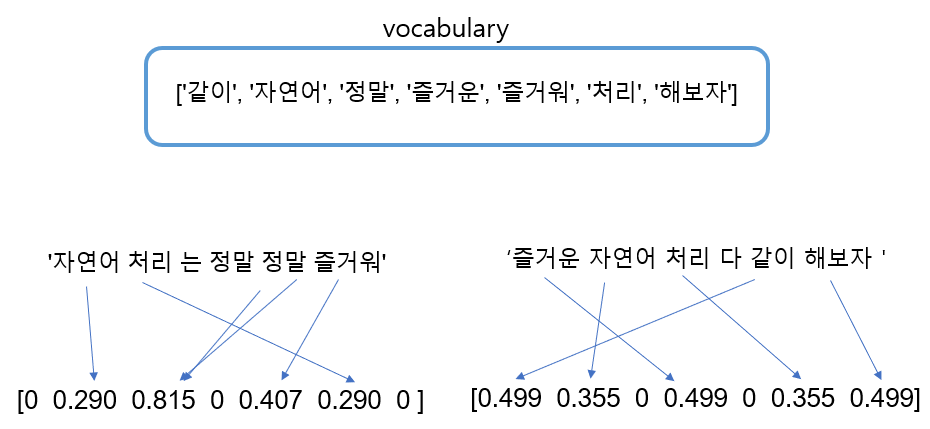</img><br/>

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 0)
tfidf_vectorizer = tfidf.fit_transform(tokens)

# tf-idf dictionary
tfidf_dict = tfidf.get_feature_names_out()
print(tfidf_dict)
print(tfidf_vectorizer.toarray())

['같이' '자연어' '정말' '즐거운' '즐거워' '처리' '해보자']
[[0.         0.29017021 0.81564821 0.         0.4078241  0.29017021
  0.        ]
 [0.49922133 0.35520009 0.         0.49922133 0.         0.35520009
  0.49922133]]


## **3-2. Padding**

- 가변 길이의 입력을 받는 모형들이 존재하지만 아쉽게도 기본적으로는 문장의 길이를 동일하게 맞춰주어야 함
- 문장의 길이를 맞춰주기 위해 부족한 길이만큼 0을 채워넣는 작업을 **Padding**이라고 부름

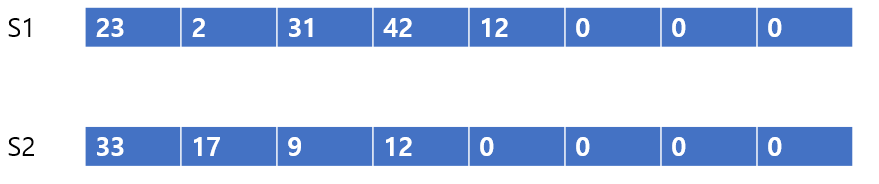</img><br/>

- 위의 예시와 같이 문장 S1의 길이와 S2의 길이가 서로 다를 때 뒤쪽에 0을 padding 해주어 같은 길이로 맞춰줌
- padding은 ```kears```에서 한 줄로 구현 가능

## **3-3. 대회 적용**

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # 정수화

def text2sequence(train_text, max_len=100):
  tokenizer = Tokenizer() # keras의 vectorizing 함수 호출
  tokenizer.fit_on_texts(train_text) # train 문장에 fit
  train_X_seq = tokenizer.texts_to_sequences(train_text) # 각 토큰들에 정수 부여(자연어 -> 정수)
  vocab_size = len(tokenizer.word_index) + 1 # 모델에 알려줄 vocabulary의 크기 계산
  print('vocab_size : ', vocab_size)
  X_train = pad_sequences(train_X_seq, maxlen = max_len) # 설정한 문장의 최대 길이만큼 padding

  return X_train, vocab_size, tokenizer

train_X, vocab_size, vectorizer = text2sequence(train['text'], max_len = 100)

vocab_size :  42331
